In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Convert field names to dict for easy access.
# Can be hard coded 
# 
fields_path = '../../input/training_validation_2/fields.csv'  
fields_df = pd.read_csv(fields_path)
fields_df.columns = ['name', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']

fields_dict = {}
fields_dictv2 = {}

for idx in range(fields_df.shape[0]):
    name = fields_df.loc[idx, 'name']

    _fields = []
    
    for f in fields_df.columns[1:]:
        if not (str(fields_df.loc[idx, f]) == 'nan'):
            _fields.append(name + "_" + str(fields_df.loc[idx, f]))
    
    fields_dict[idx] = {'name': fields_df.loc[idx, 'name'] , 'fields': _fields}
    fields_dictv2[name] = _fields
    
# fields_dict

In [3]:
feature_list = [fields_dict[7]['name']]
feature_list_regex= "|".join(["^"+f+"_" for f in feature_list])

feature_list

['EPOSVelocity']

In [4]:
# import data
data_df_1 = pd.read_csv("../../data/training_validation_1.csv")
data_df_2 = pd.read_csv("../../data/training_validation_2.csv")
merged_df = pd.concat([data_df_1, data_df_2], axis=0) # Merge data frames


In [5]:
train_df = merged_df.filter(regex=feature_list_regex)
# train_df = train_df.filter(regex="vCnt|value")
# train_df = data_df_2.filter(regex="^Temperature")

In [6]:
train_df.head()

,EPOSVelocity_vCnt,EPOSVelocity_vFreq,EPOSVelocity_vMax,EPOSVelocity_vMin,EPOSVelocity_vStd,EPOSVelocity_vTrend,EPOSVelocity_value
0,0,0.000000,NaN,NaN,NaN,NaN,NaN
1,76,7.531853,1109.0,-1193.0,249.585923,1.578674,24.157895
2,76,7.518368,1139.0,-1185.0,391.256574,2.089132,-15.368421
3,76,7.563049,1042.0,-1359.0,452.439066,-1.427218,-39.750000
4,76,7.563380,1247.0,-1344.0,456.054556,-2.290581,28.710526


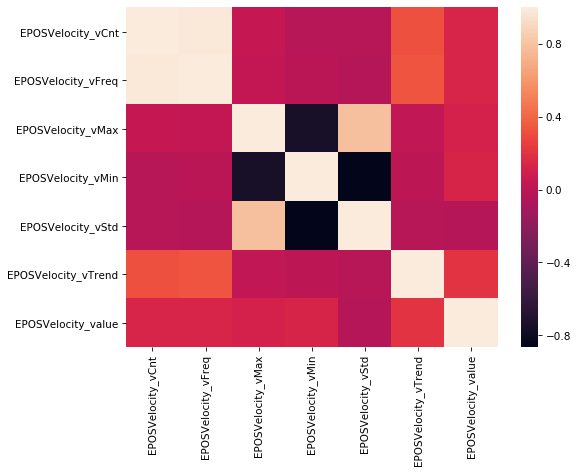

In [7]:
fig = plt.figure(figsize=(8,6), dpi=75)
sns.heatmap(train_df.corr(),annot=False)

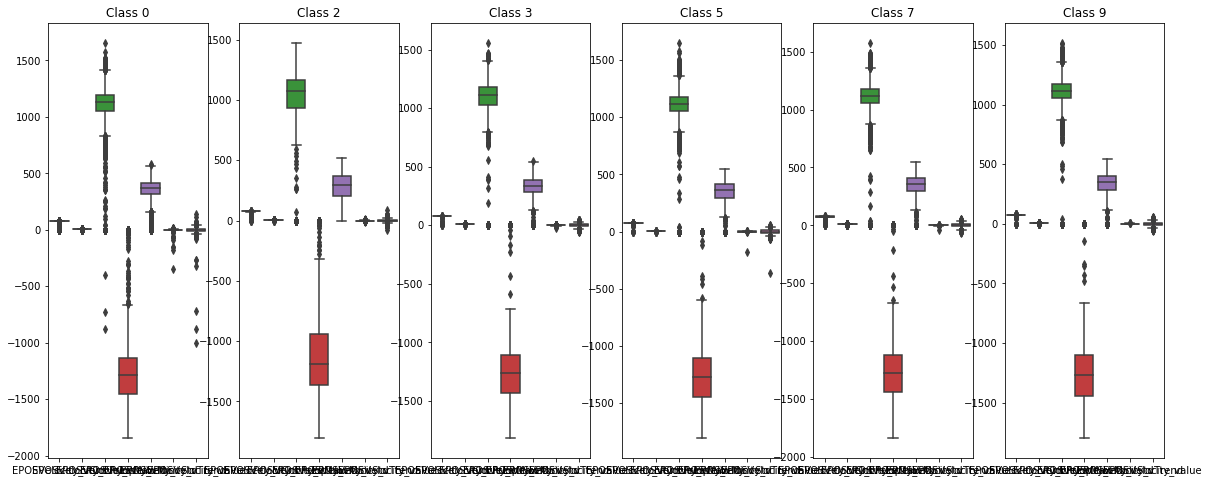

In [8]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()

fig, axes = plt.subplots(1, len(classes), sharex=True, figsize=(20,8))
# fig.suptitle('1 row x 2 columns axes with no data')

for idx, c in enumerate(classes):
    df = train_df[merged_df['class'] == c].copy()
#     df = train_df.copy()
    sns.boxplot(data=df, ax=axes[idx])
    axes[idx].set_title('Class '+str(c))


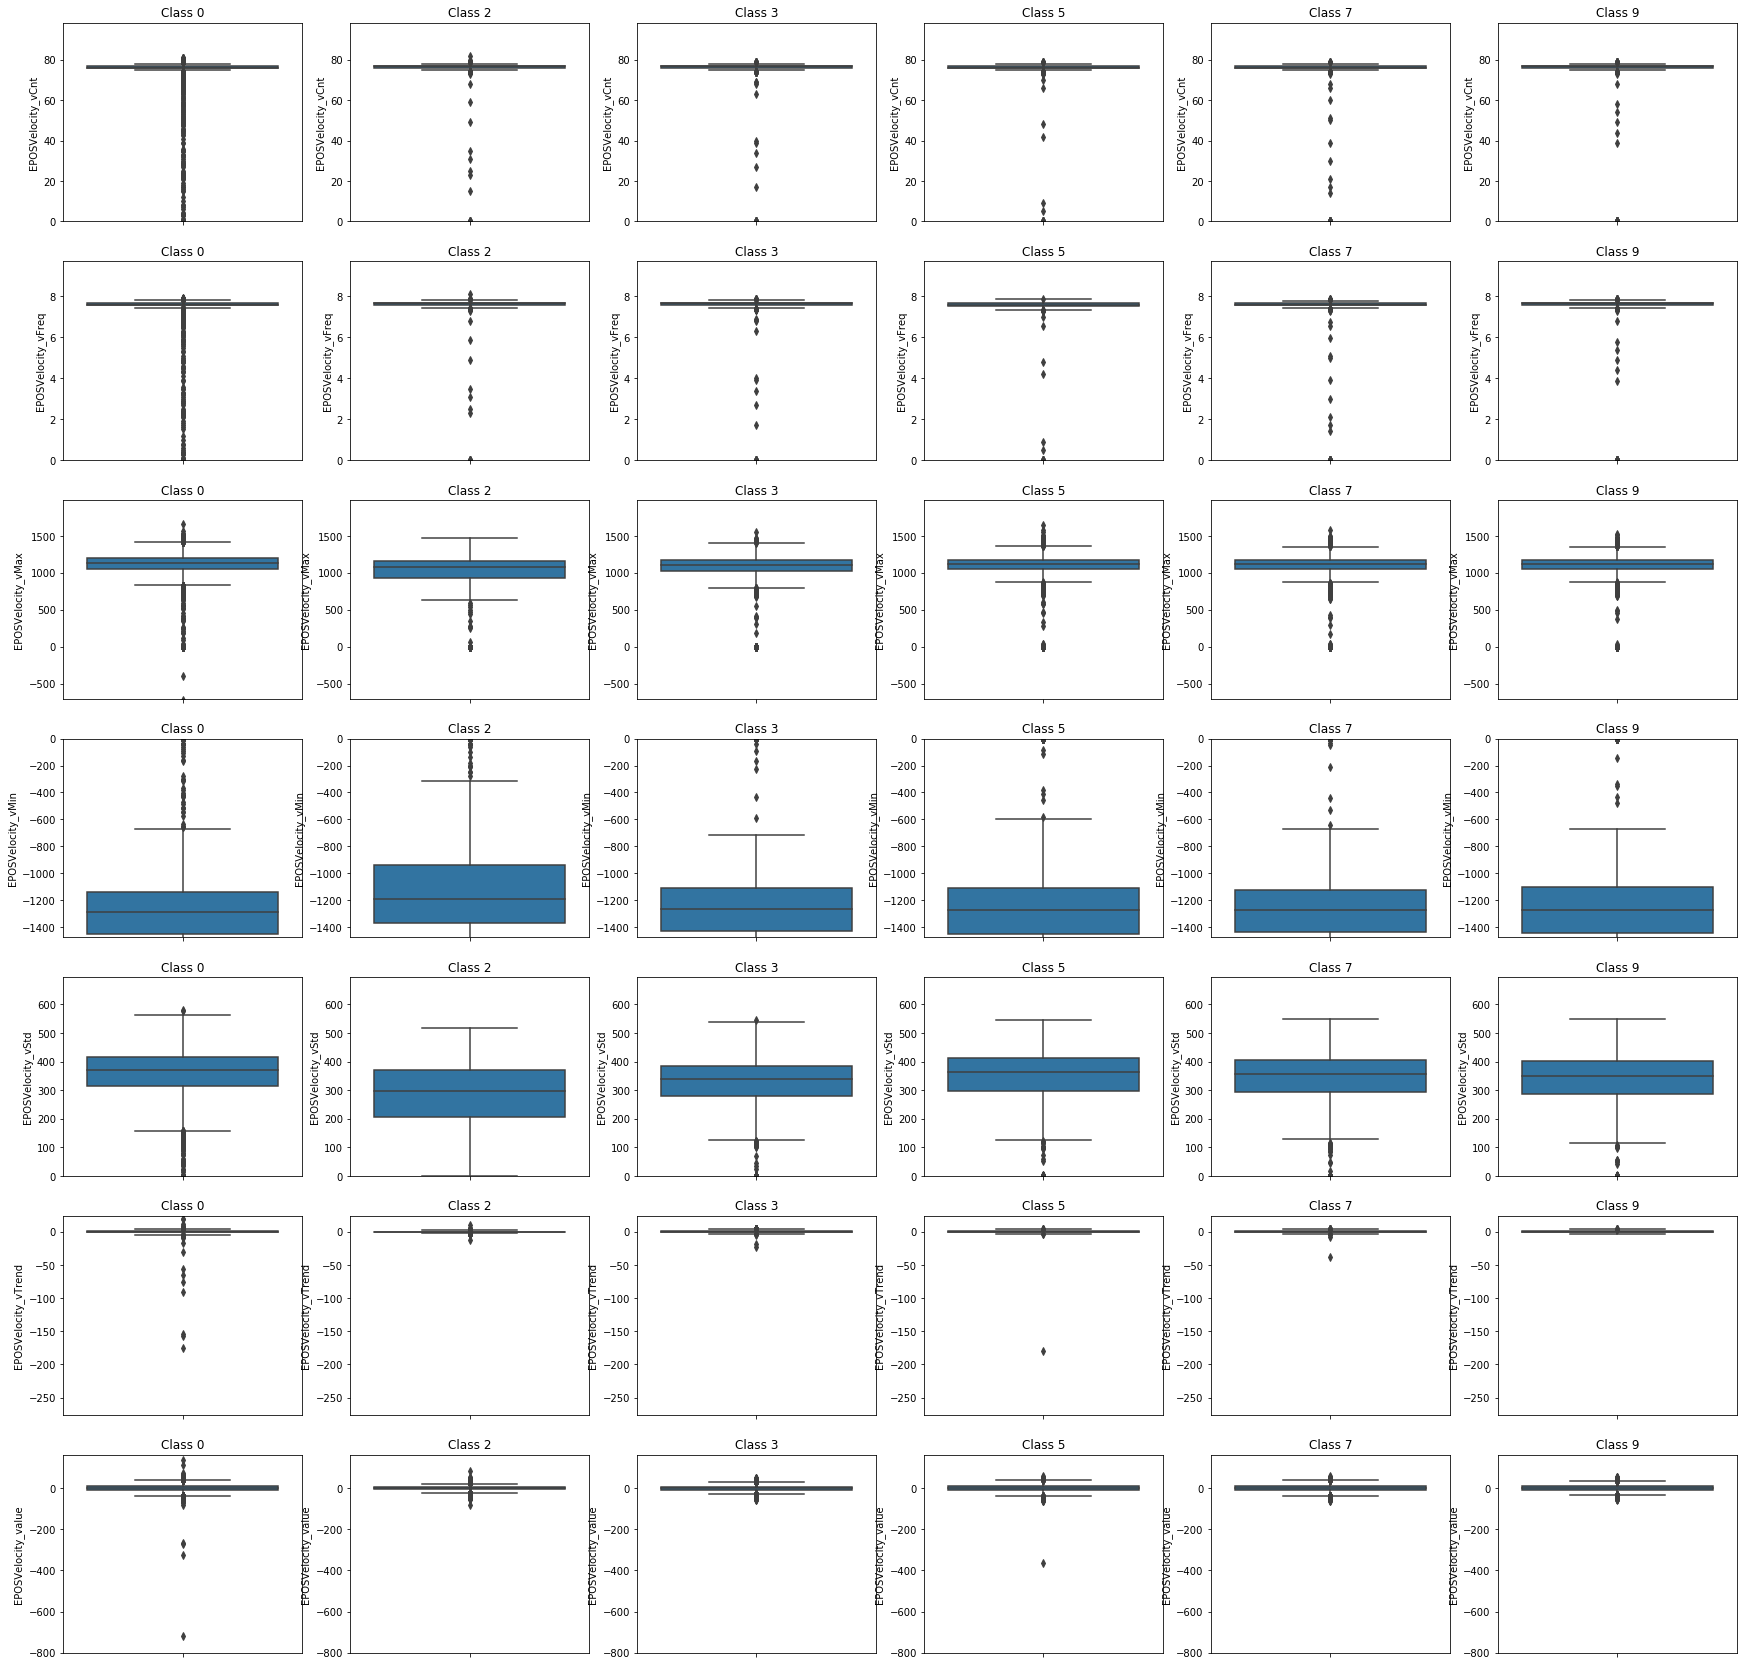

In [9]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()
features = train_df.columns

fig, axes = plt.subplots(len(features), len(classes), sharex=True, figsize=(30,30))
# print (axes)
# fig.suptitle('1 row x 2 columns axes with no data')

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()
#         print (f, c, df2.columns)
        sns.boxplot(y=df2[f], ax=axes[idx1, idx2])
        axes[idx1, idx2].set_title('Class '+str(c))
        axes[idx1, idx2].set_ylim(0.8*df[f].min(), 1.2*df[f].max())


In [10]:
# classes = data_df_2['class'].unique()
# features = train_df.columns

# fig, axes = plt.subplots(len(features), 1, sharex=True, figsize=(30,16))

# for idx1, f in enumerate(features):
#     df = data_df_2[[f, 'class']].copy()
#     axes[idx1].set_title('Feature '+str(f))
#     for idx2, c in enumerate(classes):
#         df2 = df[df['class'] == c].copy()
#         axes[idx1].boxplot(x=df2[f], positions=[idx2], labels=[c])
    


In [11]:
# train_df2 = pd.concat([data_df_2['class'], train_df], axis=1)
# axes = train_df2.groupby('class').boxplot(figsize=(20, 10))

In [12]:
classes = data_df_2['class'].unique()
features = train_df.columns

new_df = pd.DataFrame()

df_list = []

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    data = [[
        99, f, df[f].max(), df[f].min(), df[f].std(), df[f].mean(), df[f].median(), df[f].count(), df[f].isna().sum(),
        ]]

    data_df = pd.DataFrame(data)

    df_list.append(data_df)

    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()

        data = [[
            c, f, df2[f].max(), df2[f].min(), df2[f].std(), df2[f].mean(), df2[f].median(), df2[f].count(), df2[f].isna().sum(),
            ]]
        
        data_df = pd.DataFrame(data)
        df_list.append(data_df)
        
new_df = pd.concat(df_list, axis=0)
        
new_df.columns = ['class', 'feature', 'max', 'min', 'std', 'mean', 'median', 'Count', 'NA_count']

In [13]:
new_df[new_df['class']==99]

,class,feature,max,min,std,mean,median,Count,NA_count
0,99,EPOSVelocity_vCnt,82.000000,0.000000,5.759785,76.010275,77.000000,39611,0
0,99,EPOSVelocity_vFreq,8.088583,0.000000,0.568766,7.564700,7.620571,39611,0
0,99,EPOSVelocity_vMax,1656.000000,-880.000000,289.583026,1057.838443,1121.000000,39435,176
0,99,EPOSVelocity_vMin,0.000000,-1845.000000,371.397549,-1213.052897,-1276.000000,39435,176
0,99,EPOSVelocity_vStd,578.821316,0.000000,110.454509,338.292726,362.947018,39435,176
0,99,EPOSVelocity_vTrend,20.028462,-344.800000,2.909143,-0.037909,-0.301961,39433,178
0,99,EPOSVelocity_value,135.583333,-1003.666667,19.169316,-0.439787,0.000000,39435,176


In [14]:
missing = 0

for c in classes:
    class_df = merged_df[merged_df['class']==c]
    runs = class_df['run'].unique()
    for r in runs:
        run_df = class_df[class_df['run'] == r]
        for f in features:
            f_df = run_df.filter([f]).copy().reset_index()
            del f_df['index']
            l = len(f_df)
            n_df = f_df[f_df[f].isna()]
#             if len(f_df) != len(n_df): print (c, r, f, len(f_df), len(n_df))
            if (len(n_df) == 0): continue
            missing += len(n_df)
            for i in list(n_df.index):
                if ((i == 0) | (i == l-1)): 
                    print ('NA at start or end')
                else:
                    print (c, r, f, len(f_df), list(n_df.index))
print (missing)

NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 1 EPOSVelocity_vMax 363 [0, 1, 362]
NA at start or end
NA at start or end
0 1 EPOSVelocity_vMin 363 [0, 1, 362]
NA at start 

0 67 EPOSVelocity_vTrend 1079 [0, 1]
NA at start or end
0 67 EPOSVelocity_value 1079 [0, 1]
NA at start or end
0 6 EPOSVelocity_vMax 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSVelocity_vMax 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSVelocity_vMax 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSVelocity_vMax 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSVelocity_vMax 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSVelocity_vMax 376 [0, 1, 2, 3, 4, 5, 6, 375]
NA at start or end
NA at start or end
0 6 EPOSVelocity_vMin 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSVelocity_vMin 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSVelocity_vMin 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSVelocity_vMin 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSVelocity_vMin 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSVelocity_vMin 376 [0, 1, 2, 3, 4, 5, 6, 375]
NA at start or end
NA at start or end
0 6 EPOSVelocity_vStd 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSVelocity_vStd 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSVelocity_vStd 376 [0, 1, 2, 3, 4, 5, 6, 375]
0 6 EPOSVelocity_v

NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
5 2 EPOSVelocity_vMax 1078 [0, 1, 2]
5 2 EPOSVelocity_vMax 1078 [0, 1, 2]
NA at start or end
5 2 EPOSVelocity_vMin 1078 [0, 1, 2]
5 2 EPOSVelocity_vMin 1078 [0, 1, 2]
NA at start or end
5 2 EPOSVelocity_vStd 1078 [0, 1, 2]
5 2 EPOSVelocity_vStd 1078 [0, 1, 2]
NA at start or end
5 2 EPOSVelocity_vTrend 1078 [0, 1, 2]
5 2 EPOSVelocity_vTrend 1078 [0, 1, 2]
NA at start or end
5 2 EPOSVelocity_value 1078 [0, 1, 2]
5 2 EPOSVelocity_value 1078 [0, 1, 2]
NA at start or end
5 3 EPOSVelocity_vMax 1079 [0, 1, 1078]
NA at start or end
NA at start or end
5 3 EPOSVelocity_vMin 1079 [0, 1, 1078]
NA at start or end
NA at start or end
5 3 EPOSVelocity_vStd 1079 [0, 1, 1078]
NA at start or end
NA at star

9 3 EPOSVelocity_vStd 1079 [0, 1, 2, 1078]
9 3 EPOSVelocity_vStd 1079 [0, 1, 2, 1078]
NA at start or end
NA at start or end
9 3 EPOSVelocity_vTrend 1079 [0, 1, 2, 1078]
9 3 EPOSVelocity_vTrend 1079 [0, 1, 2, 1078]
NA at start or end
NA at start or end
9 3 EPOSVelocity_value 1079 [0, 1, 2, 1078]
9 3 EPOSVelocity_value 1079 [0, 1, 2, 1078]
NA at start or end
9 5 EPOSVelocity_vMax 361 [359, 360]
NA at start or end
9 5 EPOSVelocity_vMin 361 [359, 360]
NA at start or end
9 5 EPOSVelocity_vStd 361 [359, 360]
NA at start or end
9 5 EPOSVelocity_vTrend 361 [359, 360]
NA at start or end
9 5 EPOSVelocity_value 361 [359, 360]
NA at start or end
882
